# Fashion MNIST

Датасет имеет следующие объекты, изображённые на картинках:

- 0 T-shirt/top (Футболка/Топ)
- 1 Trouser (Брюки)
- 2 Pullover (Пуловер)
- 3 Dress (Платье)
- 4 Coat (Пальто)
- 5 Sandal (Сандали)
- 6 Shirt (Рубашка)
- 7 Sneaker (Кроссовки)
- 8 Bag (Сумка)
- 9 Ankle boot (Ботинки)

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

## Работа с данными

In [2]:
train_data = pd.read_csv('data/fashion-mnist_train.csv')
test_data = pd.read_csv('data/fashion-mnist_test.csv')

train_data.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
# Разбиваем на лейблы и данными о пикселях
# Данные сразу масштабируем путём деления на 255 (т.к. яркость пикселя кодируется 1 байтом)
X_train = train_data.drop(columns='label') / 255
X_test = test_data.drop(columns='label') / 255
y_train = train_data['label']
y_test = test_data['label']
X_train

pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3         0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
...       ...     ...     ...       ...       ...     ...     ...       ...   
59995     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59996     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59997     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59998     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59999     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

       pixel9  pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0         0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
1         0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
2         0.0      0.0  ...  0.000000  0.000000  0.000000  0.117647  0.168627   
3         0.0      0.0  ...  0.011765  0.000000  0.000000  0.000000  0.000000   
4         0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
...       ...      ...  ...       ...       ...       ...       ...       ...   
59995     0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
59996     0.0      0.0  ...  0.286275  0.000000  0.000000  0.000000  0.000000   
59997     0.0      0.0  ...  0.627451  0.635294  0.639216  0.529412  0.368627   
59998     0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
59999     0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0      0.000000       0.0       0.0       0.0       0.0  
1      0.000000       0.0       0.0       0.0       0.0  
2      0.000000       0.0       0.0       0.0       0.0  
3      0.003922       0.0       0.0       0.0       0.0  
4      0.000000       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
59995  0.000000       0.0       0.0       0.0       0.0  
59996  0.000000       0.0       0.0       0.0       0.0  
59997  0.000000       0.0       0.0       0.0       0.0  
59998  0.000000       0.0       0.0       0.0       0.0  
59999  0.000000       0.0       0.0       0.0       0.0  

[60000 rows x 784 columns]

In [4]:
# Указываем размерность данных
# Т.к. картинки имеют разрешение 28 на 28, то указываем первым параметром
# в метод reshape -1, чтобы numpy сам вычислил первую размерность
# (это будет обозначать количество картинок), вторым и третьим
# параметром указываем разрешение картинки 28x28, а четвёртым,
# последним параметром, 1, так как картинки чёрно-белые (имеют один канал)
# Т.е. формат размерности (batch, rows, cols, channels),
# т.к. keras стандартно ожидает именно такой формат
X_train = np.array(X_train).reshape((-1, 28, 28, 1))
X_test = np.array(X_test).reshape((-1, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [5]:
# тестовые и обучающие лейлбы принимают целочисленные значения от 0 до 9,
# так как на выходе у нейронной сети будет вектор с 10 значениями, обозначающие
# вероятность того или иного класса, то необходимо применить one-hot кодирование

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

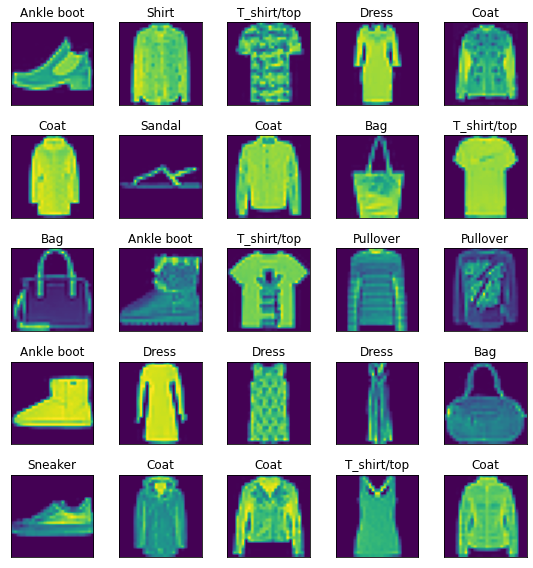

In [6]:
# Посмотрим что получилось:
names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8, 8))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.title(names[y_train[i].argmax()])
    plt.tight_layout()
plt.show()

## Работа с моделью

В качестве модели для классификации изображений выберем свёрточную нейронную сеть.
Пусть архитектура сети будет иметь 2 свёрточного слоя.

### Краткое описание слоёв из _keras_ которые мы будем использовать.

#### Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format, activation, input_shape, …)
* filters - число ядер (фильтров, каналов)
* kernel_size - размер ядра (в виде кортежа или числа(тогда ядро будет квадратным))
* strides - шаг сканирования ядра по осям плоскости
* padding - отступы для сохранения размерности изображения после свёртки (в частности padding='same' нужно добавлять нулевые значения, а padding='valid' не нужно)
* data_format - формат поступающих данных (data_format='channels_last' обозначает стандартный формат (batch, rows, cols, channels), data_format='channels_first' обозначает формат (batch, channels, rows, cols))
* activation - функция активации
* input_shape - размерность входных данных

В частности Conv1D используют для свёртки аудио,
Conv2D для картинок, а Conv3D для видео.

Обычно в концепции свёрточных нейронных сетей
после данного слоя должен идти слой, укрупняющий
масштаб полученных признаков.
Для этого используют пулинг по максимальным значениям.

#### MaxPool2D(pool_size=(2, 2), strides, padding='valid', data_format)
* pool_size=(2, 2) - размер окна, в котором выбирается максимальное значение
* strides - шаг сканирования по осям плоскости
* padding - аналогично Conv2D
* data_format - полностью аналогично Conv2D

Для решения проблемы переобучения используют слой,
который случайным образом выбирает доли единиц и при каждом
обновлении назначает им значение 0.

#### Dropout(rate, seed=NULL …)
* rate - float в диапазоне от 0 до 1. Доля вводимых единиц, которую нужно отбросить.
* seed - случайное зерно

В конце концов полученные карты признаков подаются
в обычную полносвязную нейронную сеть, для этого карты
"выравниваются" в единичную размерность.

#### Flatten(data_format)
* data_format - полностью аналогично Conv2D

In [7]:
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout

# Определяем модель как последовательность слоев
model = keras.models.Sequential()

# Добавление 1-го свёрточного слоя:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.3))

# Добавление 2-го свёрточного слоя
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.3))

# Выравниваем полученные карты
model.add(Flatten())

# Добавляем классификатор - плоносвязную нейронную сеть
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Выходной слой с 10 нейронами для каждого из 10 классов
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [8]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
%%time
cnn = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 15s 5ms/step - loss: 0.7553 - accuracy: 0.7272 - val_loss: 0.5019 - val_accuracy: 0.8228

In [13]:
%%time
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2261 - accuracy: 0.9174

[0.22610948979854584, 0.9174000024795532]

In [14]:
pred = model.predict(X_test,verbose=1)

313/313 [==============================] - 0s 1ms/step


In [16]:
preds = []
for i in range(0,len(pred)):
    preds.append(pred[i].argmax())

actual = []
for i in range(0,len(y_test)):
    actual.append(y_test[i].argmax())

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(actual, preds))
print(classification_report(actual, preds, target_names=names))

[[876   2  21  20   0   0  75   1   5   0]
 [  1 984   1  11   1   1   1   0   0   0]
 [ 12   0 884  12  35   0  57   0   0   0]
 [ 11   6   4 935  27   0  17   0   0   0]
 [  1   1  69  17 841   0  71   0   0   0]
 [  0   1   0   0   0 967   0  19   1  12]
 [106   2  47  20  51   0 770   0   4   0]
 [  0   0   0   0   0   5   0 971   0  24]
 [  2   1   4   0   3   0   5   3 982   0]
 [  0   0   0   0   0   0   0  36   0 964]]
              precision    recall  f1-score   support

 T_shirt/top       0.87      0.88      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.88      0.87      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.88      0.84      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.77      0.77      0.77      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.96     

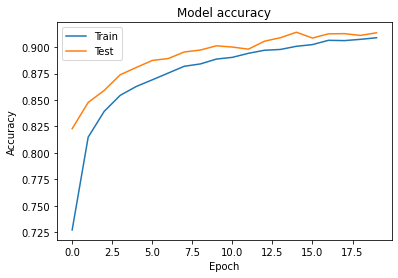

In [17]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

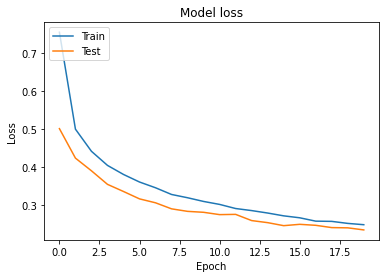

In [18]:
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


